In [1]:
import os
from os import path

os.environ["DEBUG"] = "fonts"

In [1]:
import torch
from transformers import AutoTokenizer, TrOCRProcessor

model_pth = 'models/tang-syn-5.0-online-epoch-1'

tokenizer = AutoTokenizer.from_pretrained(model_pth)
processor = TrOCRProcessor.from_pretrained("microsoft/trocr-base-handwritten")

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.


In [2]:
import random

import torch
from torch.utils.data import Subset

from lib.data_aug_v2 import build_data_aug
from lib.datasets import load_datasets, list_text_files, load_texts
from lib.tang_syn_config import preload_fonts, load_syn_config
from train import load_training_config


TRAINING_CONFIG = "deit-base-macbert-bicubic"
SYN_CONFIG = "tang_syn_config-64"
MAX_LENGTH = 64


# Load fonts
training_config = load_training_config(
    TRAINING_CONFIG,
    syn_config_name=SYN_CONFIG)

syn_config = training_config.get("syn_config")

fonts = preload_fonts(syn_config)

# Load texts
text_files = list_text_files()
texts = load_texts(text_files)

# Load datasets
train_dataset, eval_datasets = load_datasets(
    processor, tokenizer, fonts=fonts, texts=texts, training_config=training_config, debug=True)

pygame 2.5.1 (SDL 2.28.2, Python 3.11.4)
Hello from the pygame community. https://www.pygame.org/contribute.html
pygame 2.5.1 (SDL 2.28.2, Python 3.11.4)
Hello from the pygame community. https://www.pygame.org/contribute.html
pygame 2.5.1 (SDL 2.28.2, Python 3.11.4)
Hello from the pygame community. https://www.pygame.org/contribute.html
pygame 2.5.1 (SDL 2.28.2, Python 3.11.4)
Hello from the pygame community. https://www.pygame.org/contribute.html
pygame 2.5.1 (SDL 2.28.2, Python 3.11.4)
Hello from the pygame community. https://www.pygame.org/contribute.html
pygame 2.5.1 (SDL 2.28.2, Python 3.11.4)
Hello from the pygame community. https://www.pygame.org/contribute.html
Fallback font cmaps loaded.
pygame 2.5.1 (SDL 2.28.2, Python 3.11.4)
Hello from the pygame community. https://www.pygame.org/contribute.html
pygame 2.5.1 (SDL 2.28.2, Python 3.11.4)
Hello from the pygame community. https://www.pygame.org/contribute.html
pygame 2.5.1 (SDL 2.28.2, Python 3.11.4)
Hello from the pygame commu

25 extra bytes in post.stringData array
165399 extra bytes in post.stringData array
158369 extra bytes in post.stringData array
201846 extra bytes in post.stringData array


All font cmaps loaded: 1589


100%|██████████| 3/3 [00:00<00:00,  4.90it/s]


Loading text files...


100%|██████████| 3879/3879 [00:08<00:00, 476.49it/s]


3879 text files loaded.
Initializing training dataset.
Initializing eval datasets.


100%|██████████| 1/1 [00:00<00:00, 664.39it/s]

Number of training examples: 72000000
Number of validation examples: 500 15


是瓢蜡蝉科下的一个
1970年10月10日病故
员许玉昭提议聘请梁新民为金门县政府县政顾问“以促进两岸关系”2003年11月30日病逝享年86岁他终生从未踏入
易北河河口维特尔斯巴赫级舰只还为1915年8
著作有《巫术与语言》、《藏族宗教史之实地研究》、《社会学论集：李安宅社会学
拍法是在正手握拍基本上向左移动四分之一使“V”字形虎口对准拍柄左上斜面拇指末节贴住左下斜面食指第三指节压在右上斜面上
导预告中的翻唱版巴布·马利歌曲〈〉、阿玛·瑟尔瓦·根菲的歌曲〈A Body, A Coffin〉和山塔·菲·克兰（Santa Fe Klan）
高中在瑞士苏黎世就读大学并于1957年获得法学博士学位也就是在这一时期他学习了作为瑞士四种官方语言之一
香港办事处”时为了妥善保管在海外华侨和港澳同胞中募集到的资金和物资并顺利送到抗日前线杨琳
合隆店”后弟弟在今天合隆街内繁华路附近开设分店为区别


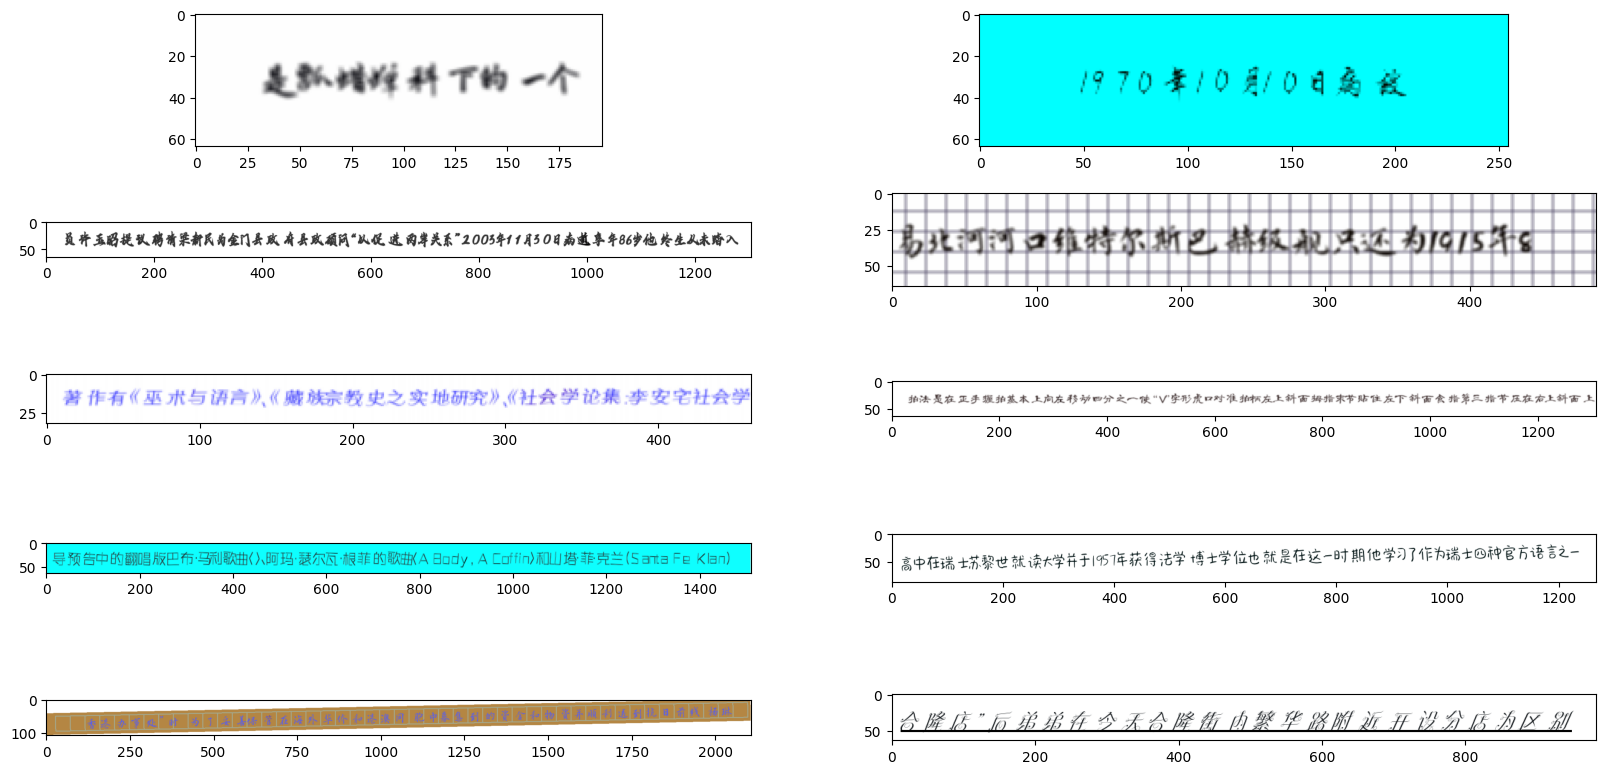

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))  # Set the figure size

length = len(train_dataset)

for i in range(10):

    random_index = random.randint(0, length - 1)
    res = train_dataset[random_index]

    plt.subplot(5, 2, i + 1)  # Create a subplot for each image
    plt.imshow(res[0])  # Display the image

    print(res[1])

plt.show()

In [11]:
tokenizer.pad_token_id

0

In [10]:
torch.Tensor(tokenizer('的因为 "e""i" 是代数的因此否定了化圆为方的可能卡尔·魏尔施特拉斯进一步扩展了他们的工作并最终在1885年证明了林德曼-魏尔斯特',
                       padding="max_length",
                       truncation=True,
                       max_length=64,
                       ).input_ids)

tensor([  101.,  4638.,  1728.,   711.,   107.,   147.,   107.,   107.,   151.,
          107.,  3221.,   807.,  3144.,  4638.,  1728.,  3634.,  1415.,  2137.,
          749.,  1265.,  1749.,   711.,  3175.,  4638.,  1377.,  5543.,  1305.,
         2209.,   185.,  7794.,  2209.,  3177.,  4294.,  2861.,  3172.,  6822.,
          671.,  3635.,  2810.,  2245.,   749.,   800.,   812.,  4638.,  2339.,
          868.,  2400.,  3297.,  5303.,  1762., 13124.,  2399.,  6395.,  3209.,
          749.,  3360.,  2548.,  3294.,   118.,  7794.,  2209.,  3172.,  4294.,
          102.])

In [10]:
tokenizer("Love",
          padding="max_length",
          truncation=True,
          max_length=64,
          return_tensors="pt")

{'input_ids': tensor([[ 101, 8451,  102,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])}

In [6]:
processor(res[0], return_tensors="pt").pixel_values.squeeze().dtype

torch.float32

In [7]:
from tqdm import tqdm

for i in tqdm(range(1000)):
    random_index = random.randint(0, length - 1)
    res = train_dataset[random_index]

100%|██████████| 1000/1000 [00:10<00:00, 93.62it/s]


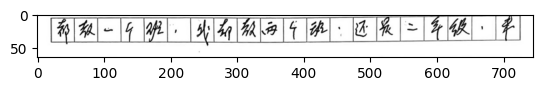

In [13]:
# Compare the two interpolation modes
import torchvision.transforms.v2 as tr2
from PIL import Image
import matplotlib.pyplot as plt

transform = tr2.Compose([
    tr2.Resize(64, interpolation=3, antialias=True)
])

img = "dataset/data/test/hwdb_ic13/image-000000007.jpg"
img = "dataset/data/test-niandai/2.png"

img = Image.open(img).convert("RGB")
img = transform(img)

plt.imshow(img)
